### Resource of this code
https://github.com/somenath203/Clustering-News-Unsupervised-Machine-Learning/blob/main/news_clustering_unsupervised_ml.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import string

In [3]:
fake = pd.read_csv("data/input/fake-news-detection/Fake.csv")
true = pd.read_csv("data/input/fake-news-detection/True.csv")
print('Fake news data: ',fake.shape)
print('True news data:',true.shape)

Fake news data:  (23481, 4)
True news data: (21417, 4)


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Combining two data to one data

In [6]:
data = pd.concat([fake, true], axis=0)
data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


### Shuffling data

In [7]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True) 
data.head()

,title,text,subject,date
0,Nigeria's Buhari sacks top civil servant after...,ABUJA (Reuters) - President Muhammadu Buhari o...,worldnews,"October 30, 2017"
1,"Schumer cites 'untruths' by Trump, Republicans...",WASHINGTON (Reuters) - Senate Democratic leade...,politicsNews,"October 24, 2017"
2,Potential Trump high court nominee mocked him ...,(Reuters) - A Texas judge identified by Donald...,politicsNews,"May 18, 2016"
3,The FBI Just Announced The Results Of Their I...,"At 11 AM Tuesday morning, FBI Director James C...",News,"July 5, 2016"
4,RECKLESS DEM MAYOR BLAMES AMTRAK ENGINEER FOR ...,Perhaps Democrat Mayor Michael Nutter is takin...,left-news,"May 16, 2015"


### Removing unwanted data before training ML models

In [8]:
data = data.drop(['title', 'subject', 'date'], axis=1)
data.head()

,text
0,ABUJA (Reuters) - President Muhammadu Buhari o...
1,WASHINGTON (Reuters) - Senate Democratic leade...
2,(Reuters) - A Texas judge identified by Donald...
3,"At 11 AM Tuesday morning, FBI Director James C..."
4,Perhaps Democrat Mayor Michael Nutter is takin...


### Modifying news texts by removing unnecessary words and other characters

In [9]:
def process_news(text):
    text = text.lower()
    text = re.sub(r'https?://S+ | www\.\S+', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    words=[]
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)


data['text'] = data['text'].apply(process_news)
data['text'].head()

0    abuja reuters  president muhammadu buhari on m...
1    washington reuters  senate democratic leader c...
2    reuters  a texas judge identified by donald tr...
3    at 11 am tuesday morning fbi director james co...
4    perhaps democrat mayor michael nutter is takin...
Name: text, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
### Separating the data 80:20 for training and testing
x = data['text']
# y = data['class']
xtrain, xtest = train_test_split(x, test_size=0.2)

### Before training, converting text to vector form

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()
xtrain = vector.fit_transform(xtrain)
xtest = vector.transform(xtest)

In [12]:
### Applying principle component analysis (PCA) on the vectorized text to reduce it from high dimension to low dimension
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2, random_state=42)
xtrain = pca.fit_transform(xtrain)

### Implementing K-means

In [13]:
# implementing k-means algorithm and finding the optimal number of clusters for k-means algorithm
wcss = []

for i in range(1, 11):

  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

  kmeans.fit(xtrain)

  wcss.append(kmeans.inertia_)

In [14]:
wcss

[744.9947482108319,
 465.9925992626886,
 312.0643288196858,
 243.47124343556158,
 198.43379567939223,
 168.65745323898372,
 143.80511144527804,
 127.18429680298524,
 115.46987393338341,
 103.36333831452261]

### Plotting the elbow point graph of the k-means algorithms

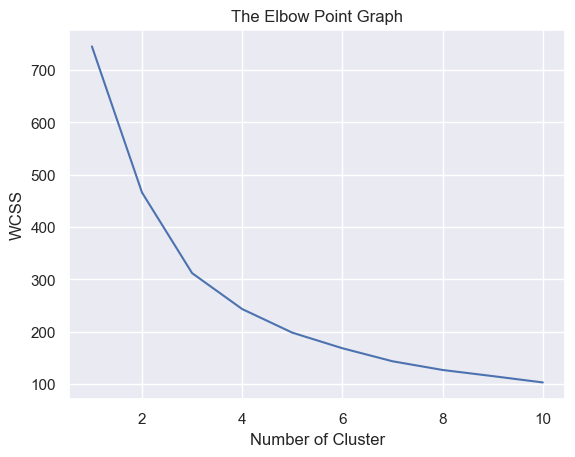

In [15]:
sns.set_theme()
plt.plot(range(1,11), wcss)

plt.title("The Elbow Point Graph")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In this elbow graph, we can see that after n_clusters=6, the graph is getting stabilized. Therefore, the optimal number of cluster for k-means is 6

### Training the model with the optimal number of clusters found in the elbow point graph

In [16]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit_predict(xtrain)

array([5, 2, 4, ..., 0, 2, 3], dtype=int32)

In [17]:
kmeans_labels = kmeans.labels_
print(kmeans_labels)

[5 2 4 ... 0 2 3]


### Plotting the clusters as a scatter plot

Text(0.5, 1.0, 'Kmeans Clustering')

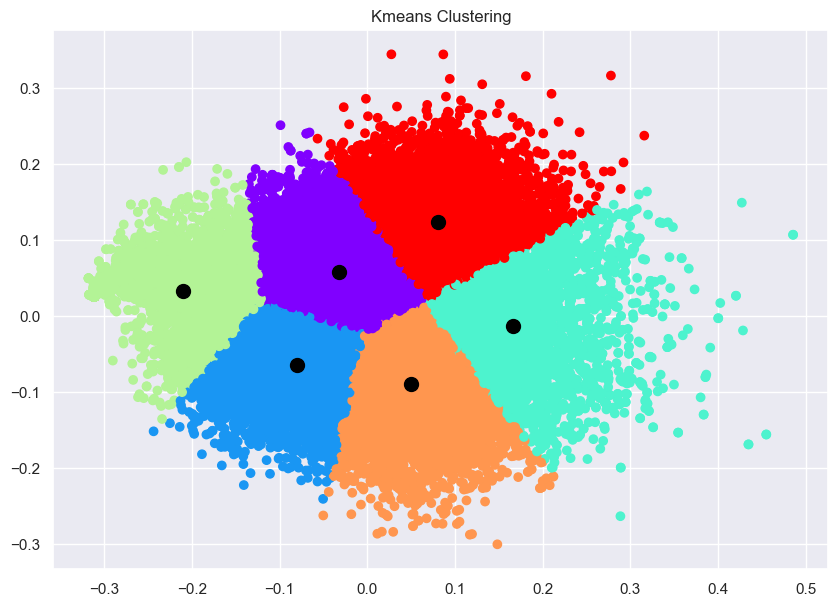

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=kmeans_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroid')
plt.title('Kmeans Clustering')

### Checking the quality of kmeans

In [19]:
# checking the quality of cluster of kmeans with the help of silhouette score
from sklearn.metrics import silhouette_score

silhouette_score_kmeans = silhouette_score(xtrain, kmeans_labels)
silhouette_score_kmeans

0.32685754357022107

### Implementing Agglomerative Hierarical Clustering Algorithm

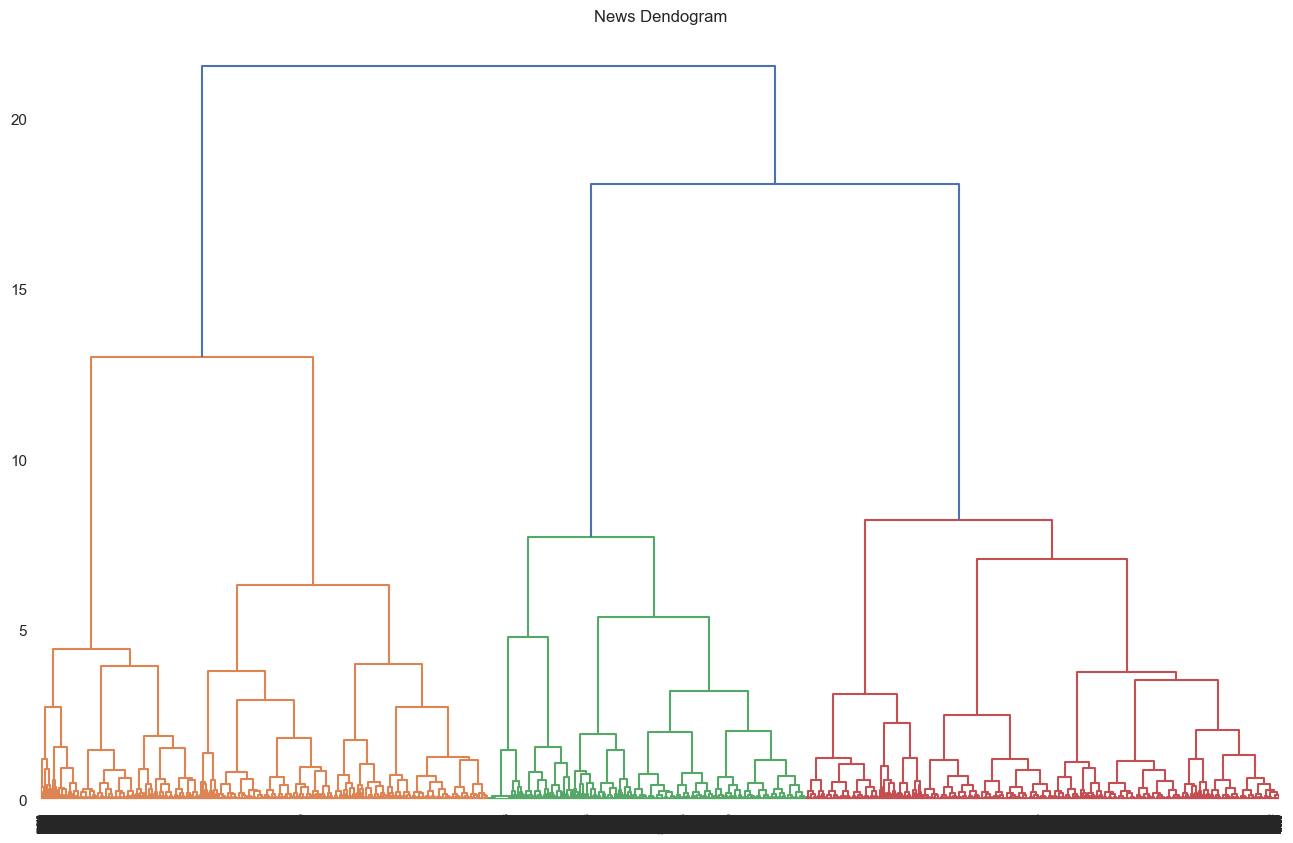

In [21]:
### Implementing Agglomerative Hierarical Clustering Algorithm and finding the optimal number fo clusters for agglomerative hierarical clustering algorithm
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 10))
plt.title('News Dendogram')

dend = shc.dendrogram(shc.linkage(xtrain, method='ward'))

By cutting the dendrogram horizontally along the longest line, we get 3 clusters, indicating that the optimal number of clusters for agglomerative clustering is 3.

In [23]:
# Training the model with the optimal number of clusters found from the dendogram
from sklearn.cluster import AgglomerativeClustering
cluster_hierarcial = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

In [24]:
cluster_hierarcial.fit_predict(xtrain)

array([0, 0, 1, ..., 2, 1, 2])

### Plotting the clusters as a scatter plot

Text(0.5, 1.0, 'Agglomerative Hierarical Clustering')

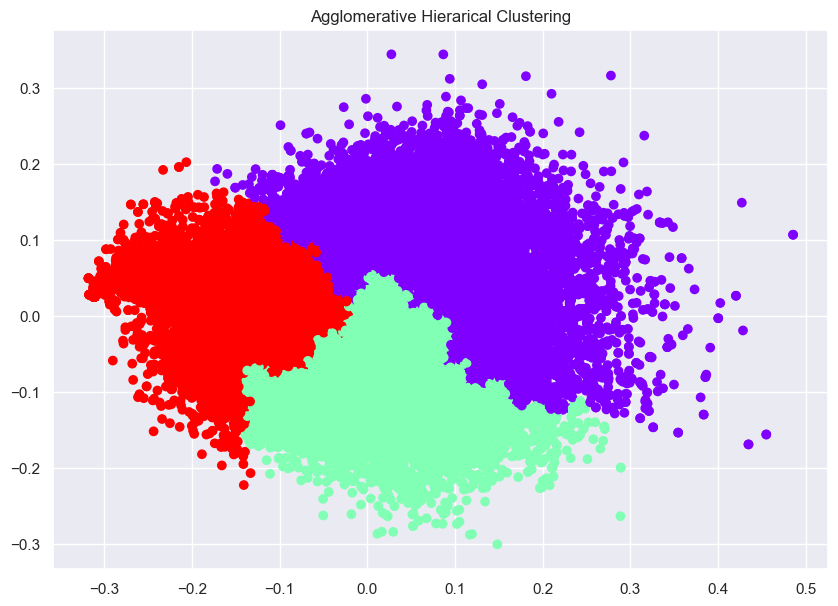

In [25]:
plt.figure(figsize=(10,7))
hiearachy_labels = cluster_hierarcial.labels_
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=hiearachy_labels, cmap='rainbow')
plt.title('Agglomerative Hierarical Clustering')

### Checking the quality of the cluster of agglomerative hierarical

In [26]:
silhouette_score_hierarchy = silhouette_score(xtrain, hiearachy_labels)
silhouette_score_hierarchy

0.3065462017363682

### Implementing K-mediods

In [30]:
from sklearn_extra.cluster import KMedoids

wcss = []

for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, init='k-medoids++', random_state=42)
    kmedoids.fit(xtrain)
    wcss.append(kmedoids.inertia_)

### Table of comparison

In [28]:
silhoutte_score_df = pd.DataFrame({
    'Algorithm': ['k-means Clustering', 'Agglomerative Hierarical Clustering'],
    'Silhouette Score': [silhouette_score_kmeans, silhouette_score_hierarchy]
})
silhoutte_score_df

,Algorithm,Silhouette Score
0,k-means Clustering,0.326858
1,Agglomerative Hierarical Clustering,0.306546


Text(0.5, 1.0, 'Silhouette Score of each Algorithm')

<Figure size 1200x800 with 0 Axes>

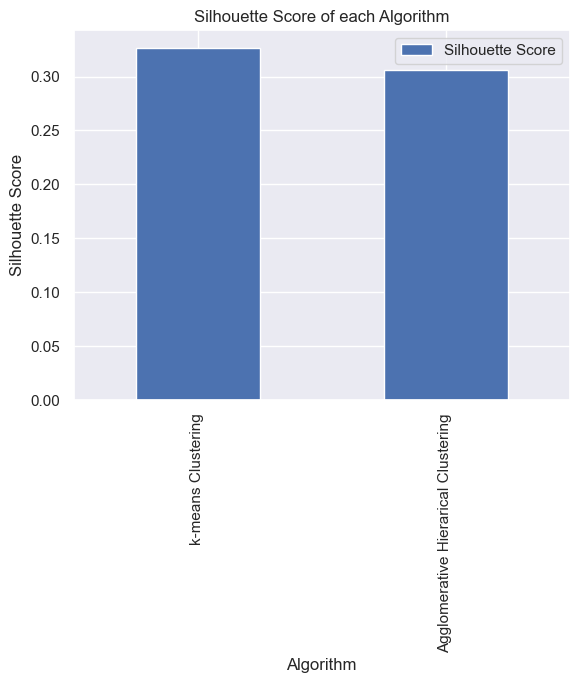

In [29]:
plt.figure(figsize=(12, 8))

silhoutte_score_df.plot(kind='bar', x='Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score of each Algorithm')

### Conclusion
From the table and the graph, it is clear that the silhouette score of Agglomerative Hierarical Clustering is highest among the three indicating that it is the best clustering algorithm for our use case.

Therefore, for this project, THE OPTIMAL NUMBER OF CLUSTERS IS 3.